Ejercicio 3: Predicción del Rendimiento Académico de Estudiantes

In [25]:
import pandas as pd # Librería para manejo de datos en tablas (DataFrames)
import numpy as np # Librería para cálculos numéricos
from sklearn.model_selection import train_test_split # Función para dividir los datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression # Modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score # Métricas de rendimiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Normalización y codificación
from tensorflow.keras.models import Sequential # Modelo secuencial de Keras
from tensorflow.keras.layers import Dense # Capa densa para redes neuronales
import matplotlib.pyplot as plt # Capa densa para redes neuronales
from sklearn.metrics import mean_absolute_error # Métrica MAE

In [26]:
!ls student_performance.csv

student_performance.csv


In [27]:
data = pd.read_csv("student_performance.csv") # Cargar los datos desde un archivo CSV

# Ver las primeras filas y estadísticas

# Mostrar las primeras filas del DataFrame
print(data.head())

# Mostrar estadísticas descriptivas
print(data.describe())

# Convertir columna categórica a numérica (1 = Sí, 0 = No)
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Separar características (X) y variable objetivo (y)
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']

# Dividir en train y test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar datos (importante para la RNA)
scaler = StandardScaler() # Inicializar normalizador
X_train_scaled = scaler.fit_transform(X_train) # Ajustar y transformar entrenamiento
X_test_scaled = scaler.transform(X_test) # Transformar prueba con los mismos parámetros

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17

In [28]:
# Crear y entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predecir en test
y_pred_lr = lr_model.predict(X_test)

# Métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Error cuadrático medio
r2_lr = r2_score(y_test, y_pred_lr)  # Coeficiente de determinación R²
print(f"Regresión Lineal - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")

Regresión Lineal - MSE: 4.07, R²: 0.99


In [29]:

new_data = pd.DataFrame({
    'Hours Studied': [5, 3, 8, 2, 6],
    'Previous Scores': [85, 70, 90, 60, 80],
    'Extracurricular Activities': [1, 0, 1, 0, 1],
    'Sleep Hours': [7, 6, 8, 5, 7],
    'Sample Question Papers Practiced': [3, 1, 5, 2, 4]
})

# Predecir
new_predictions_lr = lr_model.predict(new_data)
print("Predicciones RL:", new_predictions_lr)

Predicciones RL: [71.2880325  48.8951532  85.80295324 35.59172042 69.25977992]


In [30]:
# Crear modelo de red neuronal con 3 capas

# Crear modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida lineal (regresión)
])

# Compilar el modelo con optimizador Adam y función de pérdida MSE
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo con datos normalizados
history = model.fit(
    X_train_scaled, y_train,
    epochs=100, # Número de épocas
    batch_size=32,  # Tamaño del lote
    validation_split=0.2, # Parte de entrenamiento usada como validación
    verbose=0 # No mostrar detalle durante entrenamiento
)

# Evaluar el modelo con datos de prueba
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"RNA - MSE: {loss:.2f}, MAE: {mae:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RNA - MSE: 4.28, MAE: 1.64


In [31]:
# Normalizar nuevos datos
new_data_scaled = scaler.transform(new_data)

# Realizar predicción con la red neuronal
new_predictions_rna = model.predict(new_data_scaled).flatten()
print("Predicciones RNA:", new_predictions_rna)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicciones RNA: [70.65129  48.73944  85.14586  35.942944 68.761246]


In [32]:
# Crear un DataFrame para comparar métricas de ambos modelos

comparison_df = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Red Neuronal'],
    'MSE': [mse_lr, loss],
    'R²': [r2_lr, r2_score(y_test, model.predict(X_test_scaled).flatten())],
    'MAE': [mean_absolute_error(y_test, y_pred_lr), mae]
})

# Mostrar comparación
print(comparison_df)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
             Modelo       MSE        R²       MAE
0  Regresión Lineal  4.066564  0.989011  1.609044
1      Red Neuronal  4.279312  0.988436  1.638938


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


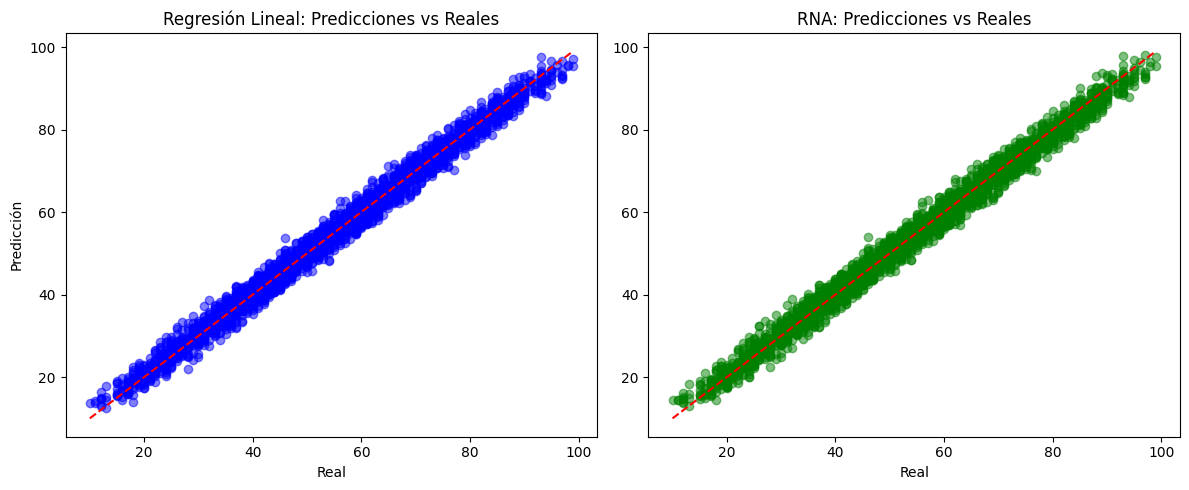

In [33]:
plt.figure(figsize=(12, 5))

# Gráfico de regresión lineal
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Regresión Lineal: Predicciones vs Reales')
plt.xlabel('Real')
plt.ylabel('Predicción')

# Gráfico de la red neuronal
plt.subplot(1, 2, 2)
y_pred_rna = model.predict(X_test_scaled).flatten()
plt.scatter(y_test, y_pred_rna, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('RNA: Predicciones vs Reales')
plt.xlabel('Real')

plt.tight_layout() # Ajustar diseño
plt.show()

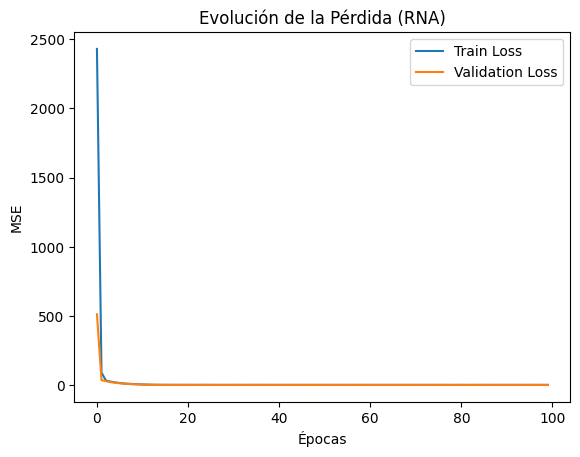

In [24]:
plt.plot(history.history['loss'], label='Train Loss')  # Pérdida en entrenamiento
plt.plot(history.history['val_loss'], label='Validation Loss')  # Pérdida en validación
plt.title('Evolución de la Pérdida (RNA)')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()